In [ ]:
import pandas
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
%matplotlib inline

data=pandas.read_csv('StudentsPerformance.csv')
data.drop(columns=data.columns[0], axis= 1 , inplace= True )
data

,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,group B,bachelor's degree,standard,none,72,72,74
1,group C,some college,standard,completed,69,90,88
2,group B,master's degree,standard,none,90,95,93
3,group A,associate's degree,free/reduced,none,47,57,44
4,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...
995,group E,master's degree,standard,completed,88,99,95
996,group C,high school,free/reduced,none,62,55,55
997,group C,high school,free/reduced,completed,59,71,65
998,group D,some college,standard,completed,68,78,77


1) Сколько в наборе данных объектов и признаков? Дать описание каждому признаку,
если оно есть.

В наборе данных 1000 объектов и 7 признков.

1. race/ethnicity - этническая группа.
2. parental level of education - уровень образования родителей.
3. lunch - обед.
4. test preparation course -курс подготовки к экзаменам.
5. math score - балл по математике.
6. reading score - балл по чтению.
7. writing score - балл по письму.

2) Сколько категориальных признаков, какие?
В наборе данных 4 категориальных признаков.

1. race/ethnicity.
2. parental level of education.
3. lunch.
4. test preparation course.

In [ ]:
data_nominal=data.loc[:,data.columns.isin(['race/ethnicity','parental level of education','lunch','test preparation course'])]
data_nominal

,race/ethnicity,parental level of education,lunch,test preparation course
0,group B,bachelor's degree,standard,none
1,group C,some college,standard,completed
2,group B,master's degree,standard,none
3,group A,associate's degree,free/reduced,none
4,group C,some college,standard,none
...,...,...,...,...
995,group E,master's degree,standard,completed
996,group C,high school,free/reduced,none
997,group C,high school,free/reduced,completed
998,group D,some college,standard,completed


3) Столбец с максимальным количеством уникальных значений категориального признака?

Все 4 столбца имеют максимальное значения категориального признака.

In [ ]:
print(data['race/ethnicity'].value_counts())
print(data['parental level of education'].value_counts())
print(data['lunch'].value_counts())
print(data['test preparation course'].value_counts())

group C    319
group D    262
group B    190
group E    140
group A     89
Name: race/ethnicity, dtype: int64
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64
standard        645
free/reduced    355
Name: lunch, dtype: int64
none         642
completed    358
Name: test preparation course, dtype: int64


4) Есть ли бинарные признаки?

Бинарные признаки отсутствуют.

5) Какие числовые признаки?

В наборе данных 3 числовых признака - math score, reading score, writing score. 

In [ ]:
data_nominal=data.loc[:,data.columns.isin(['math score','reading score','writing score'])]
data_nominal

,math score,reading score,writing score
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75
...,...,...,...
995,88,99,95
996,62,55,55
997,59,71,65
998,68,78,77


6) Есть ли пропуски?

Пропуски отсутствуют.

In [ ]:
data.isna().sum()

race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

7) Сколько объектов с пропусками?

Объекты с пропусками отсутствуют.

In [ ]:
print(sum(data.isnull().sum(axis=1)))

0


8) Столбец с максимальным количеством пропусков?

В наборе данных отсутствуют пропуски.

9) Есть ли на ваш взгляд выбросы, аномальные значения?

Выбросы и аномальные значения отсутствуют, так как разброс максимальных и минимальных значений по сравнению с средним не велико.

In [ ]:
data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


10) Столбец с максимальным средним значением после нормировки признаков через
стандартное отклонение?

Стоблец с максимальным средним значением - math score_std

In [ ]:
scale_features_std = StandardScaler() 
features_std = scale_features_std.fit_transform(data[['math score']]) 
data['math score_std']=features_std
features_std=scale_features_std.fit_transform(data[['reading score']])
data['reading score_std']=features_std
features_std=scale_features_std.fit_transform(data[['writing score']])
data['writing score_std']=features_std

data_std=data.loc[:,data.columns.isin(['math score_std','reading score_std','writing score_std'])]
data_std.describe()

,math score_std,reading score_std,writing score_std
count,1.000000e+03,1.000000e+03,1.000000e+03
mean,8.704149e-17,2.167155e-16,-1.350031e-16
std,1.000500e+00,1.000500e+00,1.000500e+00
min,-4.360728e+00,-3.574960e+00,-3.822345e+00
25%,-5.997164e-01,-6.968462e-01,-6.784278e-01
50%,-5.872457e-03,5.694554e-02,6.228578e-02
75%,7.199368e-01,6.736842e-01,7.206978e-01
max,2.237538e+00,2.112741e+00,2.103363e+00


11) Столбец с целевым признаком.

Всего можно выделить 3 столбца с целевым признаком - math score,reading score, writing score.


In [ ]:
target = data[['math score', 'reading score', 'writing score']]

data[['math score', 'reading score', 'writing score']].to_numpy()

print(target)

     math score  reading score  writing score
0            72             72             74
1            69             90             88
2            90             95             93
3            47             57             44
4            76             78             75
..          ...            ...            ...
995          88             99             95
996          62             55             55
997          59             71             65
998          68             78             77
999          77             86             86

[1000 rows x 3 columns]


12) Сколько объектов попадает в тренировочную выборку при использовании
train_test_split с параметрами test_size = 0.3, random_state = 42?



Для начала необходимо предобработать категориальные признаки.

In [ ]:
data.rename(columns = {'race/ethnicity':'race_ethnicity'},inplace=True)
data.rename(columns = {'parental level of education':'parental_level_of_education'},inplace=True)
data.rename(columns = {'test preparation course':'test_preparation_course'},inplace=True)

label = LabelEncoder()
label.fit(data.race_ethnicity)
data.race_ethnicity= label.transform(data.race_ethnicity)

label = LabelEncoder()
label.fit(data.parental_level_of_education)
data.parental_level_of_education = label.transform(data.parental_level_of_education)

label = LabelEncoder()
label.fit(data.test_preparation_course)
data.test_preparation_course = label.transform(data.test_preparation_course)

label = LabelEncoder()
label.fit(data.lunch)
data.lunch = label.transform(data.lunch)


data_nominal=data.loc[:,data.columns.isin(['race_ethnicity','parental_level_of_education','test_preparation_course','lunch'])]
data_nominal

,race_ethnicity,parental_level_of_education,lunch,test_preparation_course
0,1,1,1,1
1,2,4,1,0
2,1,3,1,1
3,0,0,0,1
4,2,4,1,1
...,...,...,...,...
995,4,3,1,0
996,2,2,0,1
997,2,2,0,0
998,3,4,1,0


In [ ]:
data

,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math score,reading score,writing score,math score_std,reading score_std,writing score_std
0,1,1,1,1,72,72,74,0.390024,0.193999,0.391492
1,2,4,1,0,69,90,88,0.192076,1.427476,1.313269
2,1,3,1,1,90,95,93,1.577711,1.770109,1.642475
3,0,0,0,1,47,57,44,-1.259543,-0.833899,-1.583744
4,2,4,1,1,76,78,75,0.653954,0.605158,0.457333
...,...,...,...,...,...,...,...,...,...,...
995,4,3,1,0,88,99,95,1.445746,2.044215,1.774157
996,2,2,0,1,62,55,55,-0.269803,-0.970952,-0.859491
997,2,2,0,0,59,71,65,-0.467751,0.125472,-0.201079
998,3,4,1,0,68,78,77,0.126093,0.605158,0.589015


Выбираем только те столбцы, которые относятся к параметрам модели и которые не были удалены в процессе предобработки. 

In [ ]:
parameters=data.loc[:,data.columns.isin(['race_ethnicity','parental_level_of_education','lunch','test_preparation_course'])]
parameters

,race_ethnicity,parental_level_of_education,lunch,test_preparation_course
0,1,1,1,1
1,2,4,1,0
2,1,3,1,1
3,0,0,0,1
4,2,4,1,1
...,...,...,...,...
995,4,3,1,0
996,2,2,0,1
997,2,2,0,0
998,3,4,1,0


Разбиение набора данных на тренировочную и тестовую выборки.

In [ ]:
x_train, x_test, y_train, y_test=train_test_split(parameters,target,test_size=.3,random_state=42)
print(y_test.shape)
print(x_test.shape)

(300, 3)
(300, 4)


300 объектов попадает в тестовую выборку.

13) Между какими признаками наблюдается линейная зависимость (корреляция)?

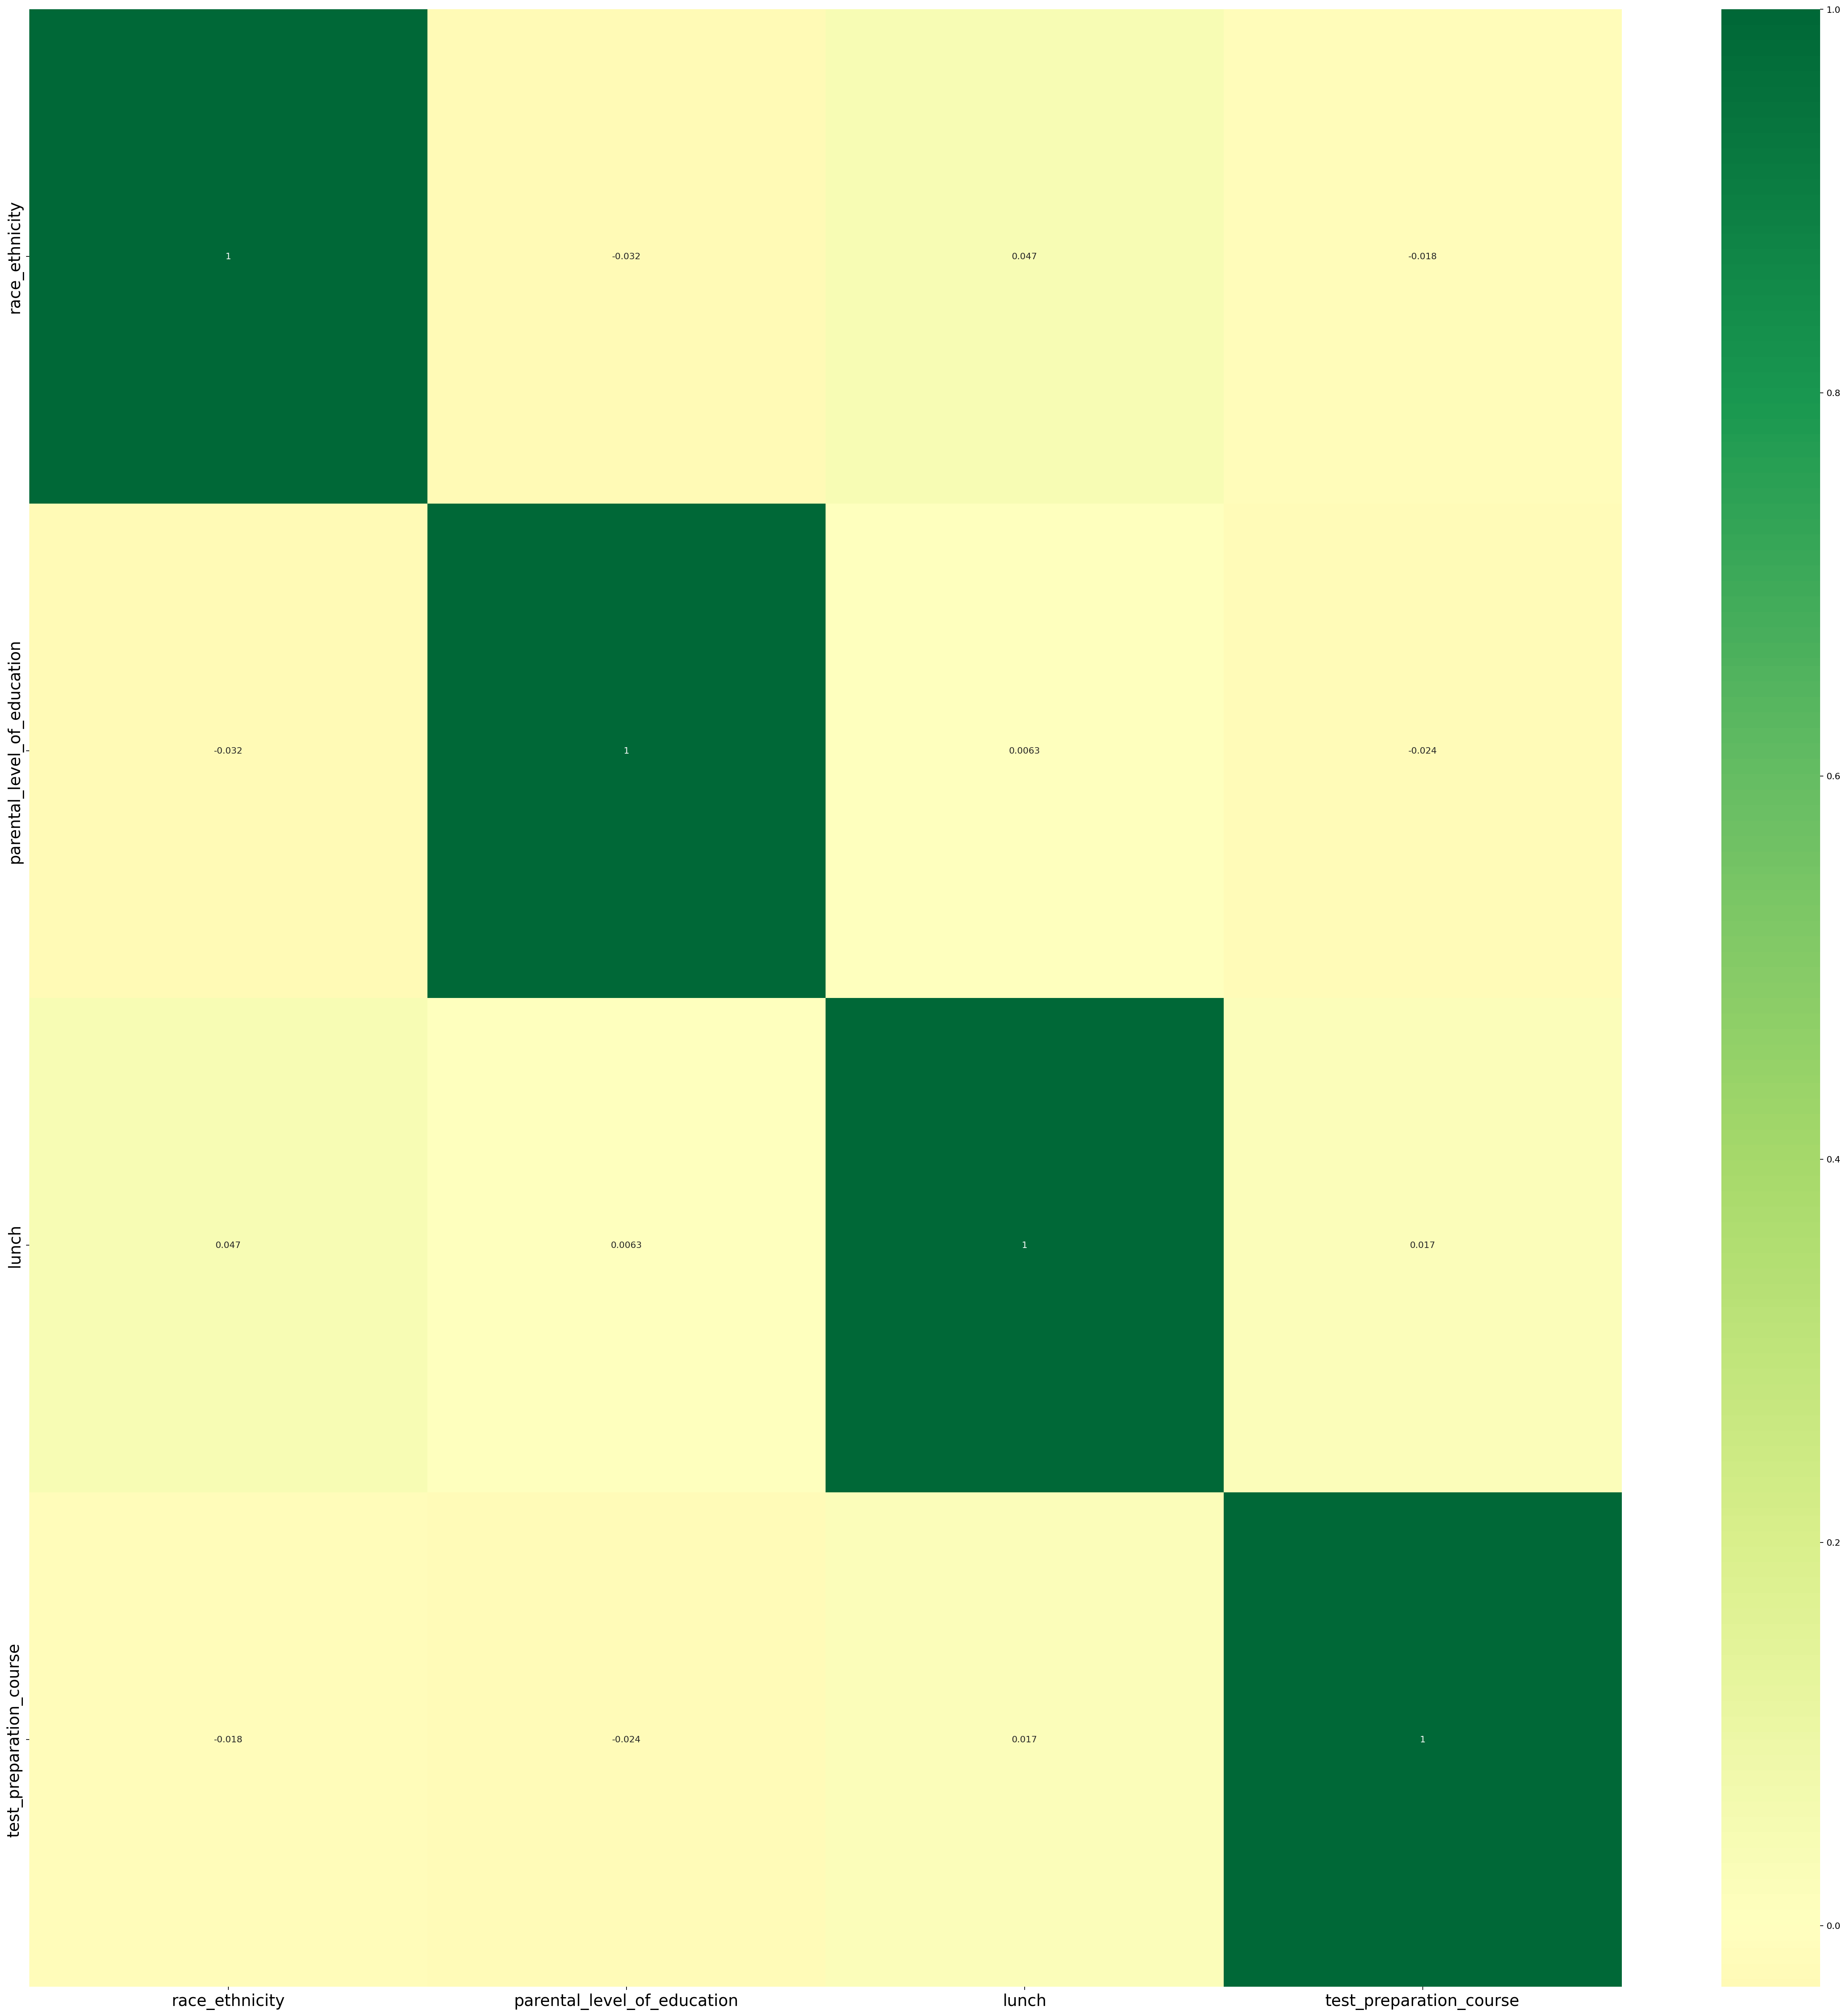

In [ ]:
plt.figure(figsize=(40,40), dpi= 160)
sns.heatmap(parameters.corr(), xticklabels=parameters.corr().columns, yticklabels=parameters.corr().columns, cmap='RdYlGn', center=0, annot=True)

plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.show()

Сильная корреляция у параметров reading score_std и writing score_std - 0.95
Также большая корреляция между параметрами math score_std и writing score_std - 0.8, math score_std и reading score_std - 0.82.

14) Сколько признаков достаточно для объяснения 90% дисперсии после применения
метода PCA?



In [ ]:
pca = PCA()
pca.fit(x_train)
x_pca = pca.transform(x_train)

for i, component in enumerate(pca.components_):
 print("{} component: {}% of initial variance".format(i + 1, round(100 * pca.explained_variance_ratio_[i], 2)))
 print(" + ".join("%.3f x %s" % (value, name) for value, name in zip(component,parameters.columns)))

1 component: 65.19% of initial variance
-0.050 x race_ethnicity + 0.999 x parental_level_of_education + 0.007 x lunch + 0.007 x test_preparation_course
2 component: 25.89% of initial variance
-0.999 x race_ethnicity + -0.050 x parental_level_of_education + -0.012 x lunch + 0.010 x test_preparation_course
3 component: 4.62% of initial variance
-0.001 x race_ethnicity + 0.010 x parental_level_of_education + -0.638 x lunch + -0.770 x test_preparation_course
4 component: 4.3% of initial variance
0.015 x race_ethnicity + 0.001 x parental_level_of_education + -0.770 x lunch + 0.638 x test_preparation_course


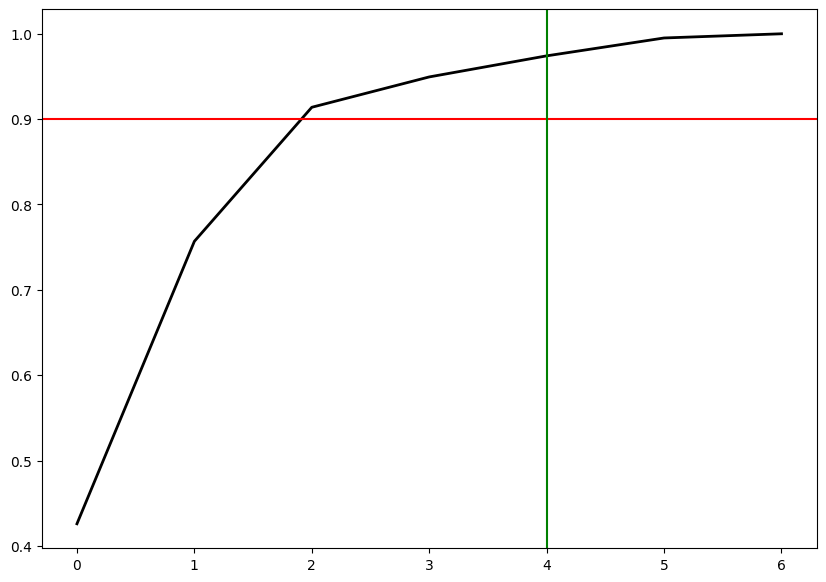

In [ ]:
plt.figure(figsize=(10,7))
plt.plot(np.cumsum(pca.explained_variance_ratio_), color='k', lw=2)
plt.axhline(0.9, c='r')
plt.axvline(4, c='g')

 Для объяснения 90% дисперсии, необходимо использовать 2 компоненты.

15) Какой признак вносит наибольший вклад в первую компоненту?

In [ ]:
print("{} component: {}% of initial variance".format(1, round(100 * pca.explained_variance_ratio_[0], 2)))
print(" + ".join("%.3f x %s" % (value, name) for value, name in zip(component,parameters.columns)))

1 component: 65.19% of initial variance
0.015 x race_ethnicity + 0.001 x parental_level_of_education + -0.770 x lunch + 0.638 x test_preparation_course


writing score_std вносит наибольший вклад в первую компоненту.

16) Построить двухмерное представление данных с помощью алгоритма t-SNE. На
сколько кластеров визуально, на ваш взгляд, разделяется выборка? Объяснить
смысл кластеров.

<ipython-input-21-11d717068d1f>:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=plt.cm.get_cmap('nipy_spectral', 2))
<ipython-input-21-11d717068d1f>:15: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=target_normalized, edgecolor='none', alpha=0.7, s=40,


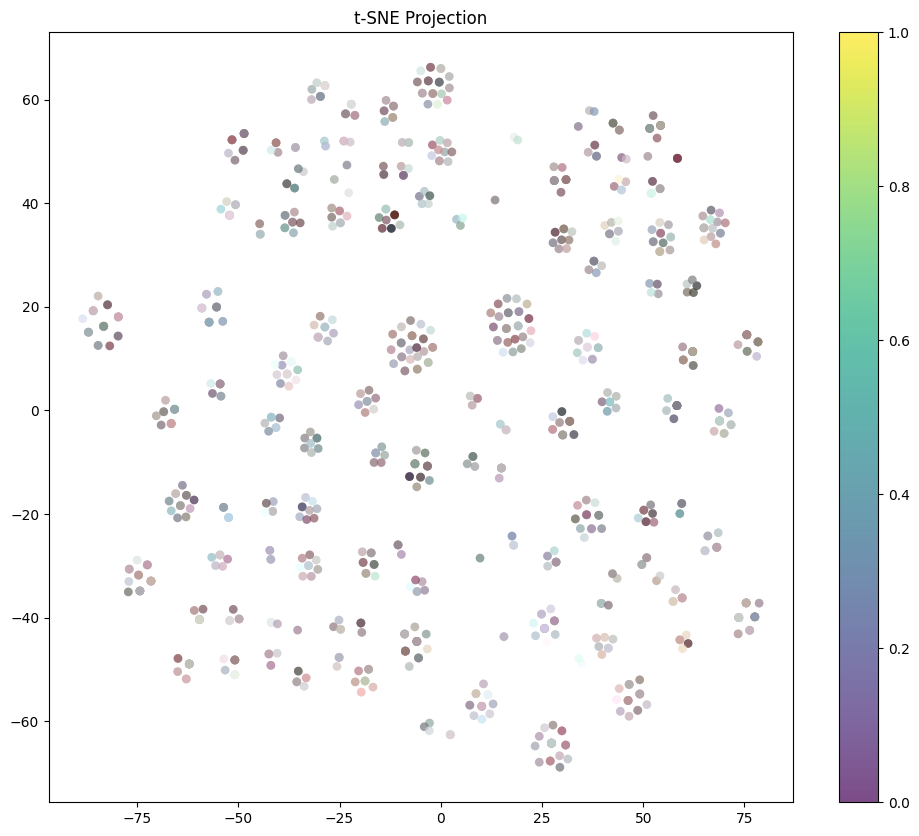

In [ ]:
from sklearn.manifold import TSNE
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Создаем объект TSNE и преобразуем данные
tsne = TSNE(random_state=47)
X_tsne = tsne.fit_transform(parameters)

# Нормализуем значения столбцов target в диапазон от 0 до 1
scaler = MinMaxScaler()
target_normalized = scaler.fit_transform(target)

# Визуализация t-SNE проекции
plt.figure(figsize=(12, 10))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=target_normalized, edgecolor='none', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('nipy_spectral', 2))
plt.colorbar()
plt.title('t-SNE Projection')

plt.show()

Возможно множество способов образования кластеров, на мой взгляд, возможно выделить 4-6 кластеров. 

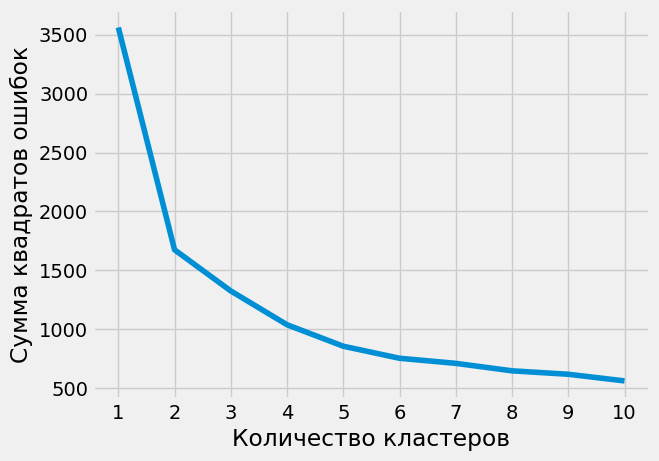

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


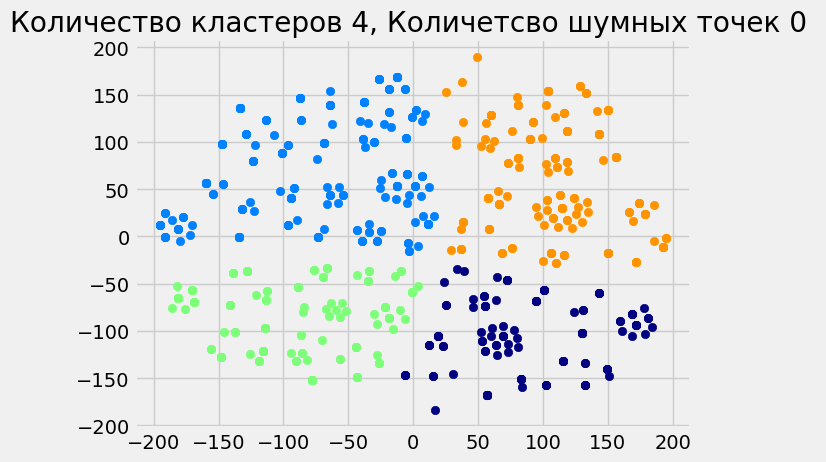

In [ ]:
from sklearn.cluster import KMeans
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(x_pca)
    sse.append(kmeans.inertia_)

plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Количество кластеров")
plt.ylabel("Сумма квадратов ошибок")
plt.show()
kmeans = KMeans(n_clusters=4, random_state = 157)
kmeans.fit(x_pca)
labels = kmeans.labels_

tsne = TSNE()
pca_2d = tsne.fit_transform(x_pca)

for label in set(labels):
    if label == -1:
        plt.scatter(pca_2d[labels == label, 0], pca_2d[labels == label, 1], color='blue')
    else:
        plt.scatter(pca_2d[labels == label, 0], pca_2d[labels == label, 1], color=plt.cm.jet(label / np.max(labels + 1)))

plt.title('Количество кластеров {}, Количетсво шумных точек {} '.format(len(set(labels)) - (1 if -1 in labels else 0), np.sum(labels == -1)))
plt.show()

Алгоритм kmeans выделяет 4 оптимальных кластера

Количество кластеров:  4
Кластер 0: 418 точек
Кластер 1: 227 точек
Кластер 2: 224 точек
Кластер 3: 131 точек


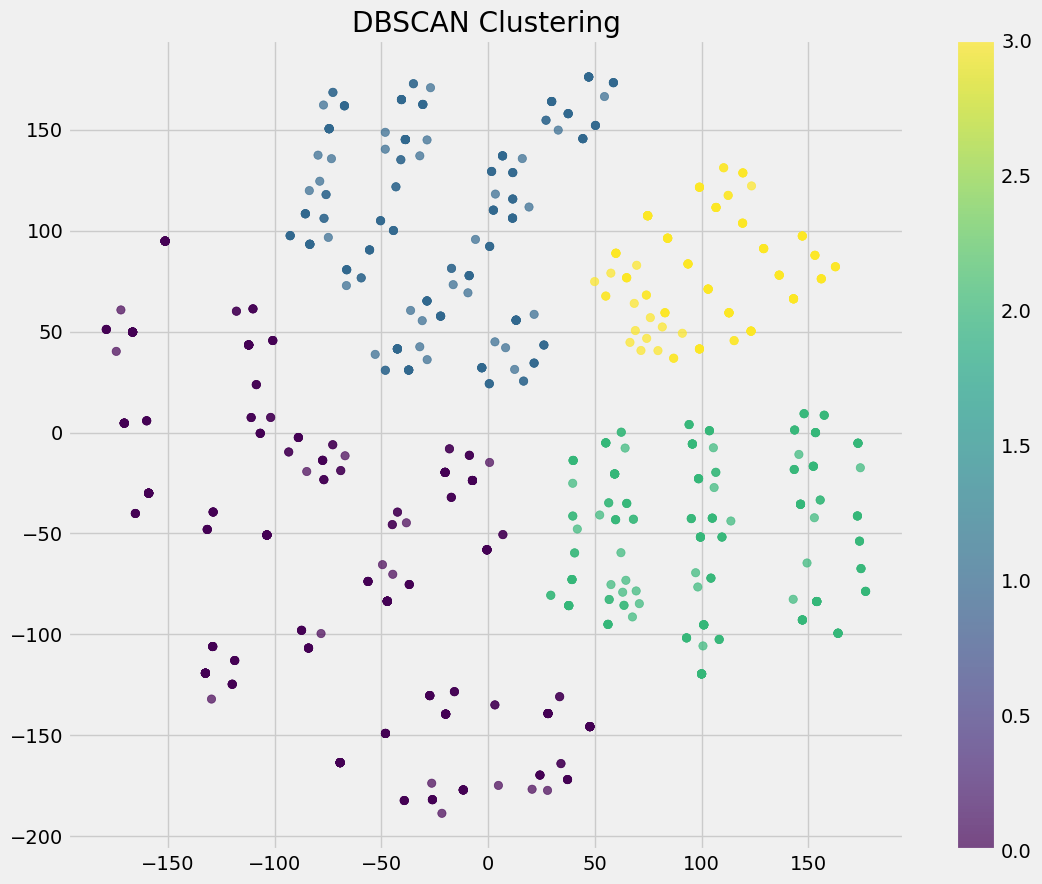

In [50]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

#Делаем стандартизацию данных
scaler = StandardScaler()
scaled_parameters = scaler.fit_transform(parameters)
#Определяем параметры DBSCAN
# 1)Радиус окрестности
eps = 2
# 2)Минимальное количество точек в окрестности
min_samples = 5

#Создаём экземпляр DBSCAN и выполняем кластеризацию
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
clusters = dbscan.fit_predict(scaled_parameters)
unique_clusters = set(clusters)

#Выводим количество полученных кластеров
num_clusters = len(unique_clusters)
print("Количество кластеров: ", num_clusters)

#Выводим количество точек в каждом кластере
for cluster_label in unique_clusters:
    num_points = len(clusters[clusters == cluster_label])
    print("Кластер {}: {} точек".format(cluster_label, num_points))

tsne = TSNE(random_state=47)
X_tsne = tsne.fit_transform(scaled_parameters)

#Визуализация результатов
plt.figure(figsize=(12, 10))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=clusters, cmap='viridis', alpha=0.7)
plt.colorbar()
plt.title('DBSCAN Clustering')

plt.show()